# Лабораторная работа №1 по численным методам 
# Автор: Ищенко Иоанн (6201-010302D)
## Вариант №2
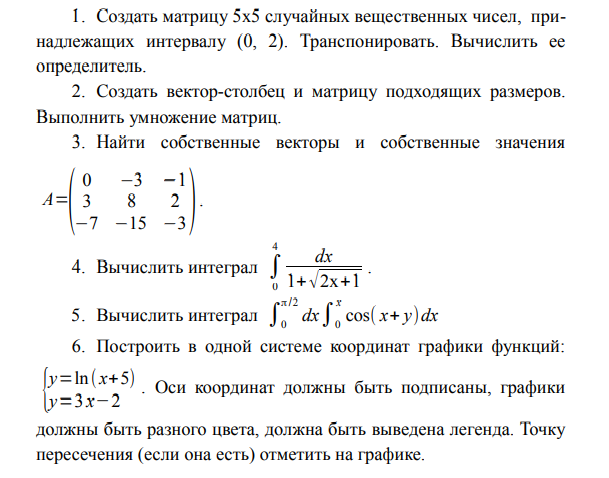

## Задание 1

In [1]:
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(919)

In [3]:
a = np.random.uniform(low=0, high=2, size=(5, 5))
a

array([[0.68493153, 0.53548027, 1.0757821 , 1.55843776, 1.67470862],
       [1.55077258, 0.29927585, 0.42121856, 1.02888637, 0.93249208],
       [0.03714473, 1.01931915, 0.80892029, 0.49588981, 0.86334717],
       [0.70018081, 0.32617425, 1.83737458, 0.35779574, 0.13569909],
       [0.63820851, 1.67848469, 0.0595351 , 1.3479705 , 0.21859126]])

In [4]:
a.transpose()

array([[0.68493153, 1.55077258, 0.03714473, 0.70018081, 0.63820851],
       [0.53548027, 0.29927585, 1.01931915, 0.32617425, 1.67848469],
       [1.0757821 , 0.42121856, 0.80892029, 1.83737458, 0.0595351 ],
       [1.55843776, 1.02888637, 0.49588981, 0.35779574, 1.3479705 ],
       [1.67470862, 0.93249208, 0.86334717, 0.13569909, 0.21859126]])

In [5]:
np.linalg.det(a)

4.383346890030668

## Задание 2
* Число столбцов первой равно числу строк второй

In [6]:
b = np.array([[5, 5]]) 
c = np.array([[3, 3], [1, 1]])
print("Матрица b:\n", b, '\n')
print("Матрица c:\n", c, '\n')
print("Результат умножения b x c:\n", b @ c)

Матрица b:
 [[5 5]] 

Матрица c:
 [[3 3]
 [1 1]] 

Результат умножения b x c:
 [[20 20]]


## Задание 3

In [7]:
a = np.array([[0, -3, -1], [3, 8, 2], [-7, -15, -3]])
w, v = np.linalg.eig(a)
print("Собственные значения:\n", w, '\n')
print("Собственные векторы:\n", v)

Собственные значения:
 [1.+0.00000000e+00j 2.+9.72139927e-08j 2.-9.72139927e-08j] 

Собственные векторы:
 [[ 4.08248290e-01+0.00000000e+00j  3.70818757e-15+3.07417637e-08j
   3.70818757e-15-3.07417637e-08j]
 [-4.08248290e-01+0.00000000e+00j -3.16227766e-01-2.04945091e-08j
  -3.16227766e-01+2.04945091e-08j]
 [ 8.16496581e-01+0.00000000e+00j  9.48683298e-01+0.00000000e+00j
   9.48683298e-01-0.00000000e+00j]]


## Задание 4

In [8]:
scipy.integrate.quad(lambda x: 1 / (1 + math.sqrt(2 * x + 1)), 0, 5)

(1.547298172560933, 6.767053391850151e-11)

## Задание 5

In [9]:
scipy.integrate.dblquad(lambda x, y: math.cos(x + y), 0, math.pi / 2, lambda x: 0, lambda x: x)

(-5.994773980952335e-17, 1.1026431538239753e-14)

## Задание 6


In [10]:
def interpolated_intercepts(x, y1, y2):
    """Find the intercepts of two curves, given by the same x data"""

    def intercept(point1, point2, point3, point4):
        """find the intersection between two lines
        the first line is defined by the line between point1 and point2
        the first line is defined by the line between point3 and point4
        each point is an (x,y) tuple.

        So, for example, you can find the intersection between
        intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

        Returns: the intercept, in (x,y) format
        """    

        def line(p1, p2):
            A = (p1[1] - p2[1])
            B = (p2[0] - p1[0])
            C = (p1[0] * p2[1] - p2[0] * p1[1])
            return A, B, -C

        def intersection(L1, L2):
            D  = L1[0] * L2[1] - L1[1] * L2[0]
            Dx = L1[2] * L2[1] - L1[1] * L2[2]
            Dy = L1[0] * L2[2] - L1[2] * L2[0]

            x = Dx / D
            y = Dy / D
            return x, y

        L1 = line([point1[0], point1[1]], [point2[0], point2[1]])
        L2 = line([point3[0], point3[1]], [point4[0], point4[1]])

        R = intersection(L1, L2)

        return R
    
    xcs, ycs = [], []
    for idx in np.argwhere(np.diff(np.sign(y1 - y2)) != 0):
        xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
        xcs.append(xc)
        ycs.append(yc)
    return np.array(xcs), np.array(ycs)

Точки пересечений:
[-4.97049516] [-16.91148549]
[1.27906675] [1.83720024]


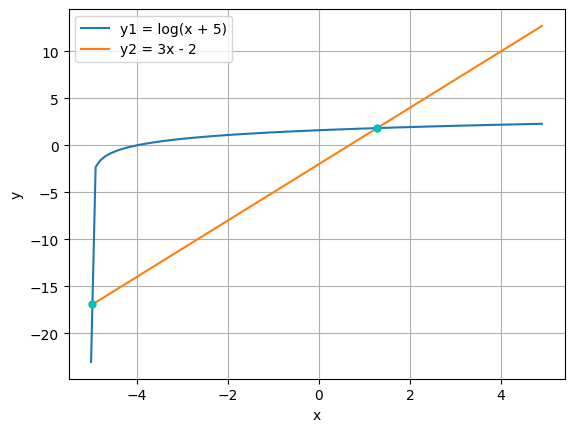

In [19]:
# Create an array of x-values from -5 to 5 with a step of 0.1
x = np.arange(-5 + 1.e-10, 5, 0.1)

y1 = np.log(x + 5)
y2 = 3*x - 2

# Plot the two graphs on the same set of axes
plt.plot(x, y1, label='y1 = log(x + 5)')
plt.plot(x, y2, label='y2 = 3x - 2')

# Расставляем точки пересечений
print('Точки пересечений:')
for xc, yc in zip(*interpolated_intercepts(x, y1, y2)):
    plt.plot(xc, yc, 'co', ms=5)
    print(xc, yc)


# Add a legend and axis labels
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


# Display the plot
plt.show()